In [1]:
using Distributions
using Plots
using StatsBase

# bimodal distribution of reward

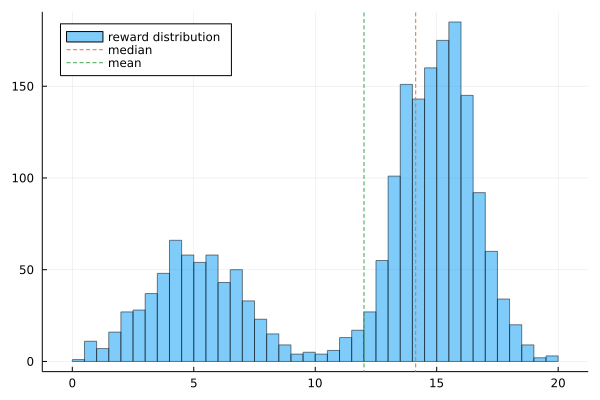

In [86]:
bimodal=MixtureModel(Normal[Normal(5, 2),Normal(15, 1.5)], [0.3, 0.7])
samples=rand(bimodal,2000)
histogram(samples;bins=0:0.5:20,legend=:topleft,label="reward distribution",alpha=0.5)
vline!([median(samples)], linestyle=:dash,label="median")
vline!([mean(samples)],linestyle=:dash,label="mean")

# traditional reinforcement learning
## converge to mean

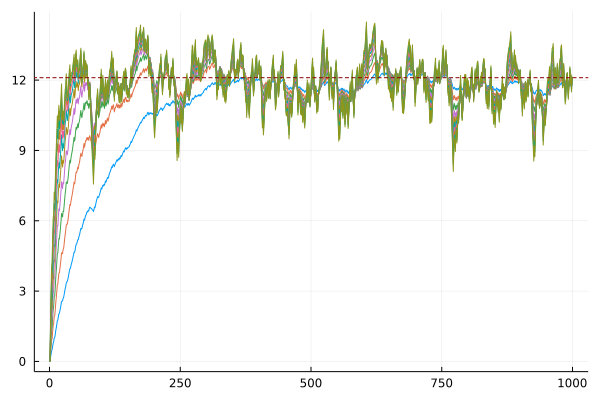

In [74]:
# RW model
blocks =10
trials = 1000
α = 0.01:0.01:0.1
vals = fill(0.0,trials,blocks)
for b in 1:blocks
    for t in 2:trials
        δ = x[t-1] - vals[t-1,b]
        vals[t,b] = vals[t-1,b] + α[b] * δ
    end
end
plot(vals,legend=false)
hline!([mean(x)], color=:darkred, linestyle=:dash)

## converge to median

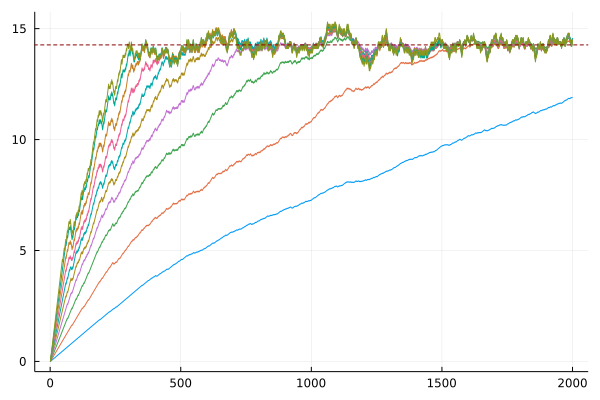

In [75]:
# binarize prediction error
blocks =10
trials = 2000
α = 0.01:0.01:0.1
vals = fill(0.0,trials,blocks)
for b in 1:blocks
    for t in 2:trials
        δ = x[t-1] - vals[t-1,b]
        if δ > 0
            δ = 1
        else 
            δ = -1
        end
        vals[t,b] = vals[t-1,b] + α[b] * δ
    end
end
plot(vals,legend=false)
hline!([median(x)], color=:darkred,linestyle=:dash)

# distributional reinforcement learning
## converge to quantile

In [76]:
# step 1: binarize prediction error
# step 2: add variability in learning rate
dblocks = 100
α₊ = range(start=0.001,stop=0.1,length=dblocks)
α₋ = range(start=0.1,stop=0.001,length=dblocks)

dvals = fill(0.0,trials,dblocks)

for b in 1:dblocks
    for t in 2:trials
        # println(x[t-1] - dvals[t-1,b])
        if x[t-1] - dvals[t-1,b] > 0
            δ = 1
            dvals[t,b] = dvals[t-1,b] + α₊[b] * δ
        else
            δ = -1
            dvals[t,b] = dvals[t-1,b] + α₋[b] * δ
        end
    end
end


In [77]:
plot(dvals,legend=false)

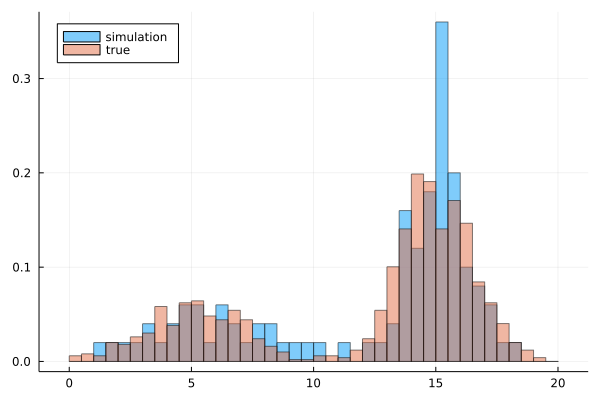

In [78]:
convergence = dvals[trials,:]
histogram(convergence,bins=0:0.5:20,normalize=true,legend=:topleft,label="simulation",alpha=0.5)
histogram!(rand(bimodal,1000);bins=0:0.5:20,normalize=true,legend=:topleft,label="true",alpha=0.5)

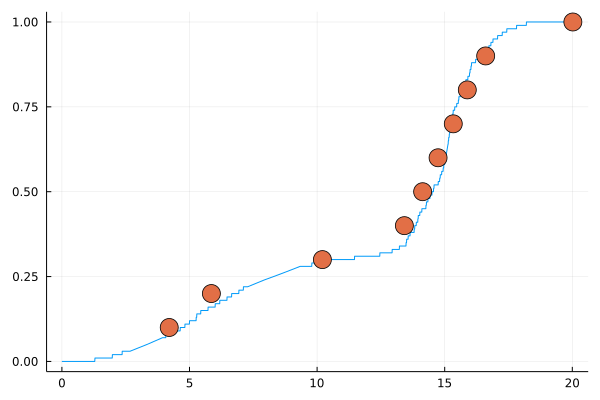

In [87]:
cdf_drl = ecdf(convergence)
plot(x -> cdf_drl(x),0,20, legend=false)
quantiles=0.1:0.1:1
values=quantile(samples,quantiles)
scatter!(values, quantiles, markersize = 10)

## converge to expectile

In [80]:
# add variability in learning rate
evals = fill(0.0,trials,dblocks)

for b in 1:dblocks
    for t in 2:trials
        δ = x[t-1] - evals[t-1,b]
        # println(δ)
        if  δ > 0
            evals[t,b] = evals[t-1,b] + α₊[b] * δ
        else
            evals[t,b] = evals[t-1,b] + α₋[b] * δ
        end
    end
end


In [81]:
plot(evals,legend=false)

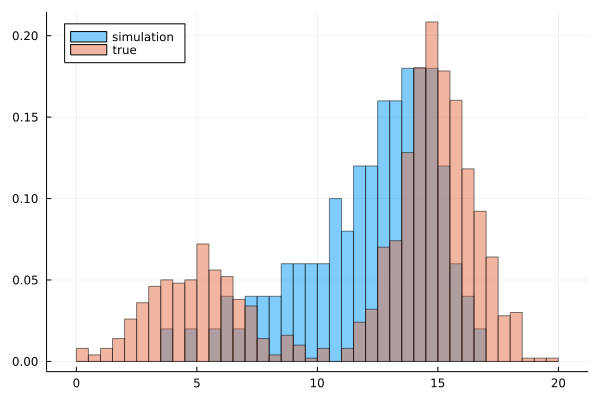

In [82]:
econvergence = evals[trials,:]
histogram(econvergence,bins=0:0.5:20,normalize=true,legend=:topleft,label="simulation",alpha=0.5)
histogram!(rand(bimodal,1000);bins=0:0.5:20,normalize=true,legend=:topleft,label="true",alpha=0.5)

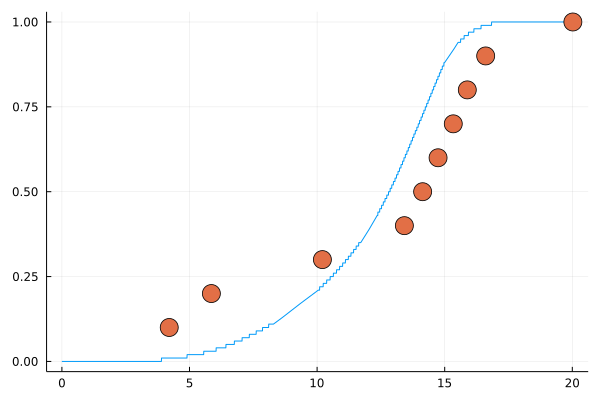

In [91]:
ecdf_drl = ecdf(econvergence)
plot(x -> ecdf_drl(x),0,20, legend=false)
quantiles=0.1:0.1:1
values=quantile(samples,quantiles)
scatter!(values, quantiles, markersize = 10)

## asymmetric scaling factor

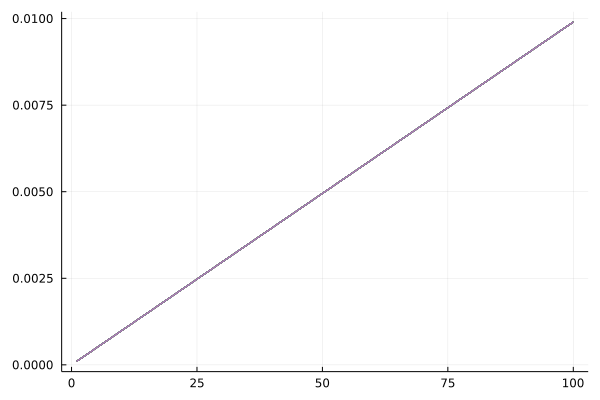

In [8]:
τ = α₊/(α₊ + α₋)
plot(τ,legend=false)